In [1]:
#1).Write a python program to display all the header tags from wikipedia.org.
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://en.wikipedia.org/wiki/Main_Page')
bs = BeautifulSoup(html, "html.parser")
titles = bs.find_all(['h1', 'h2','h3','h4','h5','h6'])
print('List all the header tags :', *titles, sep='\n\n')

List all the header tags :

<h1 class="firstHeading mw-first-heading" id="firstHeading" style="display: none">Main Page</h1>

<h1><span class="mw-headline" id="Welcome_to_Wikipedia">Welcome to <a href="/wiki/Wikipedia" title="Wikipedia">Wikipedia</a></span></h1>

<h2 class="mp-h2" id="mp-tfa-h2"><span id="From_today.27s_featured_article"></span><span class="mw-headline" id="From_today's_featured_article">From today's featured article</span></h2>

<h2 class="mp-h2" id="mp-dyk-h2"><span class="mw-headline" id="Did_you_know_...">Did you know ...</span></h2>

<h2 class="mp-h2" id="mp-itn-h2"><span class="mw-headline" id="In_the_news">In the news</span></h2>

<h2 class="mp-h2" id="mp-otd-h2"><span class="mw-headline" id="On_this_day">On this day</span></h2>

<h2 class="mp-h2" id="mp-tfl-h2"><span id="From_today.27s_featured_list"></span><span class="mw-headline" id="From_today's_featured_list">From today's featured list</span></h2>

<h2 class="mp-h2" id="mp-tfp-h2"><span id="Today.27s_featu

In [11]:
#2)Write a python program to display IMDB’s Top rated 100 movies’ data (i.e. name, rating, year of release)
#and make data frame
from bs4 import BeautifulSoup
import requests
import re
 
 
# Downloading imdb top 250 movie's data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
 
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
 
ratings = [b.attrs.get('data-value')
           for b in soup.select('td.posterColumn span[name=ir]')]
 
votes = [b.attrs.get('data-value')
         for b in soup.select('td.ratingColumn strong')]
 
list = []
 
# create a empty list for storing
# movie information
list = []
 
# Iterating over movies to extract
# each movie's details
for index in range(0, len(movies)):
     
    # Separating  movie into: 'place',
    # 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    list.append(data)
 
# printing movie details with its rating.
for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'] +
          ') -', 'Starring:', movie['star_cast'], movie['rating'])

1 - The Shawshank Redemption (1994) - Starring: Frank Darabont (dir.), Tim Robbins, Morgan Freeman 9.240020627694737
2 - The Godfather (1972) - Starring: Francis Ford Coppola (dir.), Marlon Brando, Al Pacino 9.16095587172126
3 - The Dark Knight (2008) - Starring: Christopher Nolan (dir.), Christian Bale, Heath Ledger 8.993787271122564
4 - The Godfather: Part II (1974) - Starring: Francis Ford Coppola (dir.), Al Pacino, Robert De Niro 8.990082560476685
5 - 12 Angry Men (1957) - Starring: Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb 8.9507284551887
6 - Schindler's List (1993) - Starring: Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes 8.940013657567775
7 - The Lord of the Rings: The Return of the King (2003) - Starring: Peter Jackson (dir.), Elijah Wood, Viggo Mortensen 8.927388983106413
8 - Pulp Fiction (1994) - Starring: Quentin Tarantino (dir.), John Travolta, Uma Thurman 8.85883484590948
9 - The Lord of the Rings: The Fellowship of the Ring (2001) - Starring: Peter Jackson (dir.

237 - Amores perros (2000) - Starring: Alejandro G. Iñárritu (dir.), Emilio Echevarría, Gael García Bernal 8.02721990336557
238 - Dune: Part One (2021) - Starring: Denis Villeneuve (dir.), Timothée Chalamet, Rebecca Ferguson 8.023999774107205
239 - The Sound of Music (1965) - Starring: Robert Wise (dir.), Julie Andrews, Christopher Plummer 8.023353819788031
240 - Life of Brian (1979) - Starring: Terry Jones (dir.), Graham Chapman, John Cleese 8.022019389189332
241 - Les quatre cents coups (1959) - Starring: François Truffaut (dir.), Jean-Pierre Léaud, Albert Rémy 8.021223772218688
242 - Persona (1966) - Starring: Ingmar Bergman (dir.), Bibi Andersson, Liv Ullmann 8.021218598575711
243 - It Happened One Night (1934) - Starring: Frank Capra (dir.), Clark Gable, Claudette Colbert 8.020462326740084
244 - La haine (1995) - Starring: Mathieu Kassovitz (dir.), Vincent Cassel, Hubert Koundé 8.019818138809157
245 - Aladdin (1992) - Starring: Ron Clements (dir.), Scott Weinger, Robin Williams 8.

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
url = "https://www.icc-cricket.com/rankings/mens/player-rankings/odi/bowling"

In [4]:
page = requests.get(url)

In [5]:
soup = BeautifulSoup(page.text,"html.parser")

In [6]:
table = soup.find("table",class_="table rankings-table")

In [7]:
f_bowler = table.find("div",class_="rankings-block__banner--name-large").text

In [8]:
b_team= table.find("div",class_="rankings-block__banner--nationality").text.replace('\n','')

In [9]:
b_rating = table.find("div",class_="rankings-block__banner--rating").text

In [10]:
bowlers = table.find_all("td",class_="table-body__cell rankings-table__name name")[0:9]

In [11]:
bowler = [f_bowler]
for i in bowlers:
    bowler.append(i.text.replace('\n',''))

In [12]:
teams = table.find_all("span",class_="table-body__logo-text")[0:9]

In [13]:
team=[b_team]
for i in teams:
    team.append(i.text)

In [14]:
ratings = table.find_all("td",class_="table-body__cell rating")[0:9]

In [15]:
rating = [b_rating]
for i in ratings:
    rating.append(i.text)

In [16]:
data = list(zip(bowler,team,rating))

In [17]:
import pandas as pd
df = pd.DataFrame(data, columns = ["Bowler Name","Team","Ratings"])
df

,Bowler Name,Team,Ratings
0,Trent Boult,NZ,737
1,Josh Hazlewood,AUS,709
2,Chris Woakes,ENG,700
3,Matt Henry,NZ,691
4,Mujeeb Ur Rahman,AFG,681
5,Jasprit Bumrah,IND,679
6,Mehedi Hasan,BAN,664
7,Kagiso Rabada,SA,658
8,Mitchell Starc,AUS,652
9,Rashid Khan,AFG,650


In [68]:
#i) Restaurant name
from bs4 import BeautifulSoup
import requests

In [69]:
page = requests.get('https://www.dineout.co.in/delhi-restaurants/buffet-special')

In [70]:
page

<Response [200]>

In [71]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/><link href="/manifest.json" rel="manifest"/><style type="text/css">
            @font-face {
                font-family: 'dineicon';
                src:  url('/fonts/dineicon.eot');
                src:  url('/fonts/dineicon.eot#iefix') format('embedded-opentype'),
                url('/fonts/dineicon.ttf') format('truetype'),
                url('/fonts/dineicon.woff') format('woff'),
                url('/fonts/dineicon.svg#dineicon') format('svg');
                font-weight: normal;
				font-style: normal;
				font-display: swap;
            }
            .hide {
                display: none !important;
            }
            .async-hide{
                opacity: inherit !important;
            }
            iframe[name="google_conversion_frame"]{
        

In [9]:
#i) Restaurant name
Restaurant_name = soup.find('div',class_="h1Wrapper")
Restaurant_name

<div class="h1Wrapper"><h1 class="listing-title">Best Buffet Special Restaurants Near Me in Delhi</h1><span class="restnt-numbers">(13)</span></div>

# scraping multiple location 

In [13]:
#iii) Location
location = [] #emplty list

for i in soup.find_all('div',class_="restnt-loc ellipsis"):
    location.append(i.text)
    
location

['Connaught Place, Central Delhi',
 '3CS Mall,Lajpat Nagar - 3, South Delhi',
 'Pacific Mall,Tagore Garden, West Delhi',
 'The Leela Ambience Convention Hotel,Shahdara, East Delhi',
 'Gardens Galleria,Sector 38A, Noida',
 'Hilton Garden Inn,Saket, South Delhi',
 'Taurus Sarovar Portico,Mahipalpur, South Delhi',
 'Indirapuram Habitat Centre,Indirapuram, Ghaziabad',
 'Vibe by The Lalit Traveller,Sector 35, Faridabad',
 'Suncity Business Tower,Golf Course Road, Gurgaon',
 'Sector 29, Faridabad',
 'NIT, Faridabad',
 'DoubleTree By Hilton Gurugram Baani Square,Sector 50, Gurgaon']

# scraping first location 

In [14]:
loc = soup.find('div',class_="restnt-loc ellipsis")
loc.text

'Connaught Place, Central Delhi'

In [24]:
#iv) Ratings
rating = soup.find('div',class_='restnt-rating-widget')
rating.text

'4.3232 votes'

In [41]:
#iv) Ratings
rating = soup.find('div',class_='restnt-rating rating-4')
rating.text

'3.5'

In [74]:
images = []
for i in soup.find_all("img", class_="no-img"):
    images.append(i['data-src'])
images

['https://im1.dineout.co.in/images/uploads/restaurant/sharpen/8/k/b/p86792-16062953735fbe1f4d3fb7e.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/3/h/c/p3643-144497865356209fdd65746.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/3/j/o/p38113-15959192065f1fcb666130c.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/4/p/m/p406-15438184745c04ccea491bc.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/7/p/k/p79307-16051787755fad1597f2bf9.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/2/v/t/p2687-1482477169585cce712b90f.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/5/v/f/p52501-16006856545f68865616659.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/3/n/o/p34822-15599107305cfa594a13c24.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/r

In [36]:
#ii) Cuisine
Cuisine = soup.find('div',class_="filter-component-wrap cuisine-wrap")
Cuisine.text

'Cuisines-+North IndianChineseItalianContinentalShow More (5)'

In [42]:
#4) Write a python program to scrape product name, price and discounts from https://meesho.com/bagsladies/pl/p7vbp .


In [14]:
from bs4 import BeautifulSoup
import requests

In [15]:
page = requests.get('https://meesho.com/bags-ladies/pl/p7vbp')

In [16]:
page

<Response [200]>

In [17]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://static-assets.meesho.com" rel="preconnect"/><link href="https://static-assets.meesho.com" rel="dns-prefetch"/><link as="font" crossorigin="true" href="https://static-assets.meesho.com/css/mier-fonts.css?display=swap" rel="preload" type="font/woff2"/><link href="https://static-assets.meesho.com/css/mier-fonts.css?display=swap" rel="stylesheet"/><title>Buy Ladies Bag Online at Lowest Prices | Meesho</title><meta content="Get the latest collection of stylish ladies bags at affordable prices online at Meesho. We have a wide range of trendy designs of bags like sling, clutch, etc." name="description"/><meta content="meesho,reseller,products,reselling" property="keywords"/><meta content="Buy Ladies Bag Online at Lowest Prices | Meesho" property="og:title"/><meta content="Get the latest collection of stylish ladies bags at affordable prices online at Meesho. We have a wide range of trendy designs of bags like sling, clutch, etc." prope

# product name

In [26]:
product_name = soup.find('div', class_="sc-dkzDqf jLzETx")
product_name

<div class="sc-dkzDqf jLzETx"><h1 class="ProductListingContent__HeadLine1-sc-e96brm-0 hiZCMX">Ladies Bag</h1></div>

# price of product

In [47]:
price = soup.find('div',class_="Card__BaseCard-sc-b3n78k-0 fVRkfg NewProductCard__PriceRow-sc-j0e7tu-5 dYYUrF NewProductCard__PriceRow-sc-j0e7tu-5 dYYUrF")
price.text

'₹584₹68415% off'

# discout on product

In [53]:
discount_product = soup.find('div', class_="Card__BaseCard-sc-b3n78k-0 iKnziG NewProductCard__DiscountRow-sc-j0e7tu-15 fpGaRM NewProductCard__DiscountRow-sc-j0e7tu-15 fpGaRM")
discount_product

<div class="Card__BaseCard-sc-b3n78k-0 iKnziG NewProductCard__DiscountRow-sc-j0e7tu-15 fpGaRM NewProductCard__DiscountRow-sc-j0e7tu-15 fpGaRM" color="white"><svg class="Icon-sc-1iwi4w1-0 gQTsJE" color="greenT2" fill="none" height="16" iconsize="20" viewbox="0 0 16 16" width="16" xmlns="http://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M13.833 5.733c0 .186 1.006 1.745 1.006 1.745.215.312-.844 2.27-.844 2.27-.105.151-.168 2.029-.168 2.029-.001.385-1.961 1.317-1.961 1.317-.17.058-1.276 1.54-1.276 1.54-.218.31-2.328-.139-2.328-.139-.17-.057-1.898.462-1.898.462-.352.118-1.806-1.541-1.806-1.541-.105-.151-1.796-.793-1.796-.793-.35-.12-.595-2.356-.595-2.356 0-.186-1.005-1.744-1.005-1.744-.215-.312.844-2.271.844-2.271.104-.151.167-2.029.167-2.029.002-.385 1.962-1.317 1.962-1.317.17-.058 1.275-1.54 1.275-1.54.218-.31 2.089.353 2.089.353.17.058 2.138-.676 2.138-.676l1.805 1.541c.106.151 1.797.793 1.797.793.35.12.594 2.356.594 2.356zM6.761 6.761a.875.875 0 11-1.238-1.237.875.875 0 011.238 1

In [ ]:
#10) Write a python program to scrape first 10 product details which include product name , price , Image URL from
#https://www.bewakoof.com/women-tshirts?ga_q=tshirts .

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
page = requests.get('https://www.bewakoof.com/women-tshirts?ga_q=tshirts')

In [3]:
page

<Response [200]>

In [4]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html>
<head>
<link href="https://images.bewakoof.com" hreflang="en-in" rel="preconnect"/>
<link href="https://images.bewakoof.com" hreflang="en-in" rel="dns-prefetch"/>
<link href="https://static.bewakoof.com" hreflang="en-in" rel="preconnect"/>
<link href="https://static.bewakoof.com" hreflang="en-in" rel="dns-prefetch"/>
<link href="https://cdn.polyfill.io" hreflang="en-in" rel="preconnect"/>
<link href="https://cdn.polyfill.io" hreflang="en-in" rel="dns-prefetch"/>
<link href="https//www.googletagmanager.com" hreflang="en-in" rel="preconnect"/>
<link href="https//www.googletagmanager.com" hreflang="en-in" rel="dns-prefetch"/>
<link href="https://fonts.gstatic.com" hreflang="en-in" rel="preconnect"/>
<link href="https://fonts.gstatic.com" hreflang="en-in" rel="dns-prefetch"/>
<link href="https://www.google-analytics.com" hreflang="en-in" rel="dns-prefetch"/>
<link href="https://connect.facebook.net" hreflang="en-in" rel="dns-prefetch"/>
<link href="https://www.facebo

In [6]:
product_name = soup.find('div', class_="headingInner")
product_name

<div class="headingInner"><h1>Women's Half Sleeve Tees</h1><span></span><div></div></div>

In [53]:
product_names = soup.find('div', class_="categoryWrapper")
product_names

<div class="categoryWrapper" style="margin-top:0"><div class="container"><div class="mainHeading"><div class="headingInner"><h1>Women's Half Sleeve Tees</h1><span></span><div></div></div></div></div><div class="categoryInnerWrapper padding0 container" style="max-height:100%;position:relative"><div class="col-sm-12 padding0 false clearfix noPdXs"><div class="categoryGridWrapper clearfix"><div class="productGrid false"></div><div><div class="emptyHeading"><p>Sorry, We couldn’t Find any matches!</p><a aria-current="false" href="/women-tshirts/default"></a></div></div></div></div></div><div class="container padding0"></div><div class="container"><div class="categoryFooterContainer d-flex"><div class="categoryFaqAndDesc d-flex flex-column"><div class="col-xs-12 catDescriptionWrapper" style="margin:40px 0px"><div class="react-tabs" data-tabs="true"><ul class="react-tabs__tab-list" role="tablist"><div style="overflow-y:hidden;overflow-x:auto"><li aria-controls="react-tabs-19489" aria-disabled

In [26]:
price = [] #empty list

for i in soup.find_all('span', class_="sellingPrice mr-1"):
    price.append(i.text.replace('₹',''))
    
price

[]

In [25]:
price = soup.find('span',class_="priceRow pull-left w100")
price

In [96]:
images = []
for i in soup.find_all("img", class_="productImgTag"):
    images.append(i['img src'])
images

[]

In [126]:
from bs4 import BeautifulSoup
import requests

In [127]:
page = requests.get('https://www.nobroker.in/')

In [128]:
page

<Response [200]>

<!DOCTYPE html>
<html lang="en"><head>
<meta content="794951570520699" property="fb:pages"/>
<meta content="smRu6aIDh5DmyCcqT_i-6MVaXrqkjSyyBL8Q1fmx-e0" name="google-site-verification"/>
<link href="https://www.nobroker.in" rel="canonical"/>
<link href="//www.googletagmanager.com" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"/>
<link href="//assets.nobroker.in" rel="dns-prefetch"/>
<link href="//images.nobroker.in" rel="dns-prefetch"/>
<link href="https://assets.adobedtm.com" rel="dns-prefetch"/>
<link href="//assets.nobroker.in/static/img/favicon.png" id="favicon" rel="shortcut icon"/>
<link href="https://images.nobroker.in/static/img/fav64.png" rel="apple-touch-icon"/>
<!--<meta charset="utf-8"/>-->
<meta charset="utf-8"/>
<meta content="app-id=com.nobroker.app&amp;referrer=utm_source%3Dnobroker%26utm_medium%3DmobileWeb" name="google-play-app"/>
<meta content="app-id=1200507100, app-argument=nobrokerapp://" name="apple-itunes-app"/>
<meta content="#f
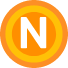
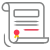
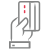
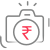
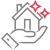
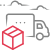
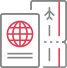
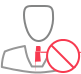
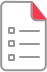
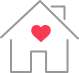
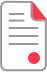
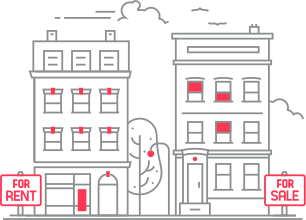
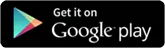

In [129]:
soup = BeautifulSoup(page.content)
soup

In [135]:
house_title = soup.find('div', class_="heading-6 flex items-center font-semi-bold m-0")
house_title

In [132]:
loc = soup.find('div',class_="mt-0.5p overflow-hidden overflow-ellipsis")
loc

In [121]:
#b) Top 10 ODI Batsmen along with the records of their team and rating

In [120]:
import sys,requests,csv,io
from bs4 import BeautifulSoup
from urllib.parse import urljoin

url = "http://www.cricbuzz.com/cricket-stats/icc-rankings/batsmen-rankings"
r = requests.get(url)
r.content
soup = BeautifulSoup(r.content, "html.parser")

maindiv = soup.find_all("div", {"class": "text-center"})
for div in maindiv:
    print(div.text)



PositionPlayerRating
 1       –    Marnus Labuschagne AUSTRALIA   892 
 2       1    Steven Smith AUSTRALIA   845 
 3       1    Kane Williamson NEW ZEALAND   844 
 4       2    Joe Root ENGLAND   843 
 5       4    Babar Azam PAKISTAN   815 
 6       2    Dimuth Karunaratne SRI LANKA   781 
 7       23    Usman Khawaja AUSTRALIA   757 
 8       2    Rohit Sharma INDIA   754 
 9       4    Travis Head AUSTRALIA   744 
 10       3    Virat Kohli INDIA   742 
 11       –    Rishabh Pant INDIA   738 
 12       2    David Warner AUSTRALIA   691 
 13       1    Liton Das BANGLADESH   683 
 14       1    Tom Latham NEW ZEALAND   679 
 15       –    Henry Nicholls NEW ZEALAND   675 
 16       –    Dean Elgar SOUTH AFRICA   672 
 17       5    Azhar Ali PAKISTAN   666 
 18       1    Devon Conway NEW ZEALAND   661 
 19       1    Mohammad Rizwan PAKISTAN   655 
 20       6    Mayank Agarwal INDIA   650 
 21       3    Mushfiqur Rahim BANGLADESH   630 
 22       2    Abid Ali PAKISTAN   622 
 